In [1]:
import numpy as np
import pandas as pd
import seaborn as sns   #89, 91
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from collections import defaultdict

In [2]:
dataset=pd.read_csv('nuovo_dataset_totale.csv')

In [3]:
dataset=dataset.drop(['id'], axis=1)

In [4]:
import pandas as pd

# Assuming your dataset is in a DataFrame called df

# Define the list of genres
genres_to_filter = ['sertanejo', 'folk', 'j-idol', 'world-music', 'songwriter',
                    'progressive-house', 'heavy-metal', 'mpb', 'opera', 'minimal-techno',
                    'new-age', 'sleep', 'emo', 'kids', 'honky-tonk', 'synth-pop',
                    'goth', 'happy', 'salsa', 'piano']

# Filter the dataset based on the 'genre' column
filtered_df = dataset[dataset['genre'].isin(genres_to_filter)]

# Now, filtered_df contains only the rows where the 'genre' column matches the specified genres


In [5]:
y=LabelEncoder().fit_transform(filtered_df["genre"])

# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean),2)

X=filtered_df.drop(['name', 'Unnamed: 0', 'artists', 'disc_number','album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'genre'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=72)

norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

C:\Users\corra\AppData\Local\Temp\ipykernel_6776\1891496897.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_artist'] = filtered_df['popularity_artist'].apply(trasforma_in_lista)
C:\Users\corra\AppData\Local\Temp\ipykernel_6776\1891496897.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['popularity_artist'] = round(filtered_df['popularity_artist'].apply(np.mean),2)


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [7]:
svm = LinearSVC()
svm.fit(X_train_norm, y_train)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = svm.predict(X_test_norm)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.546572934973638
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.55       186
           1       0.43      0.06      0.11       203
           2       0.41      0.05      0.09       187
           3       0.66      0.71      0.68       196
           4       0.51      0.72      0.60       195
           5       0.63      0.76      0.69       235
           6       0.63      0.62      0.63       196
           7       0.69      0.83      0.75       211
           8       0.68      0.88      0.77       187
           9       0.36      0.12      0.18       204
          10       0.57      0.64      0.61       215
          11       0.39      0.58      0.47       167
          12       0.48      0.30      0.37       173
          13       0.50      0.64      0.56       210
          14       0.51      0.75      0.61       202
          15       0.57      0.76      0.65       218
          16       0.76      

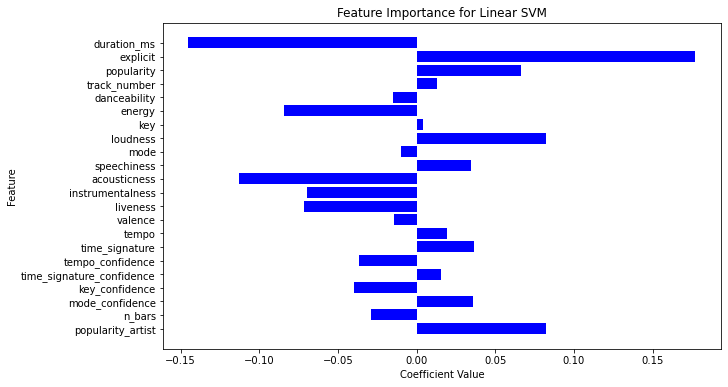

In [12]:
# Assuming you have trained a linear SVM classifier named 'svm'

# Extract feature coefficients
coefficients = svm.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, coefficients, color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear SVM')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the highest coefficient at the top
plt.show()
